# Week 1 tutorial: Data preprocessing and analysis

## Question 1

You are working for a pharmaceutical company that is interested in understanding the antimicrobic property of various molecules as a function of their respective three-dimensional (3D) structures. A preprocessing step involves transforming the 3D structure of each molecule to a computer-readable, numerical format (features). One such transformation method is to use an approach called the Coloumb matrix that mimics the electrostatic interaction between the nuclei of the atoms in a molecule.

Coulomb matrix (M) is calculated using the equation below.

\begin{equation}
    M_{ij}^\mathrm{Coulomb}=\left\{
        \begin{matrix}
        0.5 Z_i^{2.4} & \text{for } i = j \\
            \frac{Z_i Z_j}{R_{ij}} & \text{for } i \neq j
        \end{matrix}
        \right.
\end{equation}

where, $M_{ij}$ are the elements of the matrix, $Z_i$ (or $Z_j$) represents the atomic number of the atom $i$ (or $j$) in the molecule, and $R_{ij}$ is the distance between atom $i$ and atom $j$.

1. Write a function that accepts a python dictionary containing the molecule information (elements, their respective atomic numbers, 3D Cartesian coordinates in Angstrom), and returns the corresponding Coulomb matrix. Test the function you wrote on the dictionary of a water and a benzene molecule given in the cell below. For example, since the water molecule has three atoms, i.e. 2 H and 1 O atoms, your function should output a 3$\times$3 matrix, where the diagonal elements contain the information for the $i=j$ case, while the off-diagonal elements contain the information for the $i \neq j$ case.

2. One important feature of the transformation method is that it should produce the same output even when the molecule is rotated. This is because the property of the molecule does not change if it is rotated and hence, the transformation method should yield the same features (in this case the same matrix). Does Coulomb matrix satisfy this rule?

In [1]:
water = {
  'elements': ['H','H','O'],
  'atomic_numbers': [1, 1, 8],
  'coordinates': [[0.00000, 0.75545, -0.47116], [0.00000, -0.75545, -0.47116], [0.00000, 0.00000, 0.11779]]
}

In [ ]:
benzene = {
   'elements': ['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H'],
   'atomic_numbers': [6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1],
   'coordinates': [[0.6825, -0.0924, 1.2087], \
                    [-0.7075, -0.0352, 1.1973], \
                    [-1.3898, 0.0572, -0.0114], \
                    [-0.6824, 0.0925, -1.2088], \
                    [0.7075, 0.0352, -1.1973], \
                    [1.3899, -0.0572, 0.0114], \
                    [2.4836, -0.1022, 0.0205], \
                    [1.2194, -0.1652, 2.1600], \
                    [-1.2644, -0.0630, 2.1393], \
                    [-2.4836, 0.1021, -0.0204], \
                    [-1.2194, 0.1652, -2.1599], \
                    [1.2641, 0.0628, -2.1395]]
}

## Solution

In [5]:
import numpy as np

def coulomb_calculator(info):
    # Taking data from dictionary
    # Note that this function must be flexible with inputs of different molecules from the user
    elements = info['elements']
    atomic_numbers = info['atomic_numbers']
    coordinates = info['coordinates']

    #Create a coulumb array to hold the answer, initally all values will be zero until we replace them
    coulomb_array = np.zeros((len(elements), len(elements)))

    #Using a nested for loop to interate through the combinations of i and j
    for i in range(len(elements)):
        for j in range(len(elements)):
            # Check if we are on a diagonal
            if i == j:
                #Apply formula for diagonal
                coulomb_array[i, j] = 0.5*atomic_numbers[i]**2.4
            else:
                #Formula for distance between 2 objects in 3D space
                distance = ((coordinates[j][0]-coordinates[i][0])**2+(coordinates[j][1]-coordinates[i][1])**2\
                                +(coordinates[j][2]-coordinates[i][2])**2)**0.5

                #Apply formula for non-diagonal
                coulomb_array[i, j] = atomic_numbers[i]*atomic_numbers[j]/distance

    #Now that the coulomb array is populated, return the matrix

    return coulomb_array


In [6]:
water_coulomb_array = coulomb_calculator(water)
print('The coulomb array for water is \n', water_coulomb_array)

The coulomb array for water is 
 [[ 0.5         0.66185717  8.35162797]
 [ 0.66185717  0.5         8.35162797]
 [ 8.35162797  8.35162797 73.51669472]]


In [ ]:
benzene_coulomb_array = coulomb_calculator(benzene)
print('The coulomb array for benzene is \n', benzene_coulomb_array)

The coulomb array for benzene is 
 [[36.8581052  25.87651053 14.94116637 12.938724   14.94079153 25.87865465
   2.78067687  5.48057628  2.78025178  1.76373684  1.54759255  1.76373054]
 [25.87651053 36.8581052  25.87968675 14.94013309 12.93885432 14.94055117
   1.76375511  2.78045042  5.48116784  2.7805875   1.76371494  1.54759268]
 [14.94116637 25.87968675 36.8581052  25.87700648 14.94109091 12.93964918
   1.5476643   1.76376289  2.78073445  5.48066246  2.78041534  1.76378866]
 [12.938724   14.94013309 25.87700648 36.8581052  25.87827715 14.94081384
   1.76374169  1.54754011  1.763739    2.78042855  5.48123405  2.78065587]
 [14.94079153 12.93885432 14.94109091 25.87827715 36.8581052  25.8787742
   2.78050658  1.76366378  1.54759846  1.7637382   2.78050791  5.48109532]
 [25.87865465 14.94055117 12.93964918 14.94081384 25.8787742  36.8581052
   5.48113799  2.78027689  1.76369155  1.54762639  1.76375622  2.7804619 ]
 [ 2.78067687  1.76375511  1.5476643   1.76374169  2.78050658  5.48113799

In [ ]:
benzene_coulomb_array.shape

(12, 12)

## Question 2

A juice manufacturing company has introduced a new product. They wanted to know if people liked the product or not, so they conducted an experiment where randomly chosen customers were asked to drink the juice and say whether they would be interested in buying the product. They have collected some relevant data, which is contained in juice_product.xlsx.

There are seven variables (or columns):
- Customer ID : A number assigned to the customer by the company.
- Interested? : If the customer is willing to buy the product, the value is 1. If not, the value is 0.
- Bottle type : The company tried selling the product in 3 different bottle designs namely 1, 2 and 3, in the increasing order of complexity; 1 being a simple design, while 3 being a complex design. This variable refers to the bottle design the customer received.
- Age : The age of the customer.
- Price : The amount the customer is willing to pay for a bottle of this product.
- Customer name : Name of the customer. Although this was asked, later they had to delete all the names due to privacy reasons.
- Gender : The gender of the customer.

Now, you have been handed this data set and asked to preprocess the data, and if possible, obtain some useful insights already with the data you have.

Here's a template to guide you with the process. There is no right or wrong answer when it comes to data science. Some approaches lead to a greater prediction accuracy, while some lead to a lower accuracy. So, this is a template I have given you based on how I approached this problem. This doesn't mean it's the best template. So, feel free to explore your own template and approach this problem in your own way.


## 1. Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## 2. Load the raw data

In [ ]:
raw_data = pd.read_excel('juice_product.xlsx')
raw_data.head()

,Customer ID,Interested?,Bottle type,Age,Price,Customer name,Gender
0,792,0,2.0,16.0,3.0,Mr. Surname,male
1,39,0,3.0,18.0,2.1,Miss. Surname,female
2,559,1,1.0,39.0,9.2,Miss. Surname,female
3,203,0,3.0,34.0,0.7,Mr. Surname,male
4,703,0,3.0,18.0,1.7,Miss. Surname,female


## 3. Explore the descriptive statistics

In [ ]:
raw_data.describe(include = 'all')

,Customer ID,Interested?,Bottle type,Age,Price,Customer name,Gender
count,652.000000,652.000000,637.000000,628.000000,652.000000,652,330
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,Mr. Surname,male
freq,NaN,NaN,NaN,NaN,NaN,421,207
mean,450.849693,0.386503,2.205651,32.058121,4.036043,NaN,NaN
std,257.475870,0.487322,0.846803,12.726176,6.305831,NaN,NaN
min,1.000000,0.000000,1.000000,10.000000,0.000000,NaN,NaN
25%,227.750000,0.000000,1.000000,22.000000,0.900000,NaN,NaN
50%,447.500000,0.000000,2.000000,30.000000,1.600000,NaN,NaN
75%,677.250000,1.000000,3.000000,39.000000,3.925000,NaN,NaN


## 4. Determine the variables of interest to us

According to you, what variables are useful in understanding if a person likes a juice product or not? Try to retain those and remove the rest.

In [ ]:
data_interest = raw_data.drop(['Customer ID'], axis=1)
data_interest.describe(include = 'all')

,Interested?,Bottle type,Age,Price,Customer name,Gender
count,652.000000,637.000000,628.000000,652.000000,652,330
unique,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,Mr. Surname,male
freq,NaN,NaN,NaN,NaN,421,207
mean,0.386503,2.205651,32.058121,4.036043,NaN,NaN
std,0.487322,0.846803,12.726176,6.305831,NaN,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN,NaN
25%,0.000000,1.000000,22.000000,0.900000,NaN,NaN
50%,0.000000,2.000000,30.000000,1.600000,NaN,NaN
75%,1.000000,3.000000,39.000000,3.925000,NaN,NaN


## 5. Address the missing values

### 5.1: Remove rows or columns containing missing values

Which variables (containing missing values) would you like to address using this method? Think a bit and then decide to remove either rows or columns from the data set.

In [ ]:
data_no_mv_m1 = data_interest.drop(['Gender'], axis=1)
data_no_mv_m1.describe(include='all')

,Interested?,Bottle type,Age,Price,Customer name
count,652.000000,637.000000,628.000000,652.000000,652
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Mr. Surname
freq,NaN,NaN,NaN,NaN,421
mean,0.386503,2.205651,32.058121,4.036043,NaN
std,0.487322,0.846803,12.726176,6.305831,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN
25%,0.000000,1.000000,22.000000,0.900000,NaN
50%,0.000000,2.000000,30.000000,1.600000,NaN
75%,1.000000,3.000000,39.000000,3.925000,NaN


### 5.2: Impute using the mean of the columns (for numerical variables)

Which numerical variables would you like to impute using the mean? Select those and proceed using the sklearn approach we saw in Lecture 2.

In [ ]:
data_no_mv_m2 = data_no_mv_m1.copy()

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = np.nan, strategy='mean')
age = data_no_mv_m1['Age'].values.reshape(-1,1)
data_no_mv_m2['Age'] = imp.fit_transform(age).flatten()
data_no_mv_m2.describe(include='all')

,Interested?,Bottle type,Age,Price,Customer name
count,652.000000,637.000000,652.000000,652.000000,652
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Mr. Surname
freq,NaN,NaN,NaN,NaN,421
mean,0.386503,2.205651,32.058121,4.036043,NaN
std,0.487322,0.846803,12.489389,6.305831,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN
25%,0.000000,1.000000,22.750000,0.900000,NaN
50%,0.000000,2.000000,30.000000,1.600000,NaN
75%,1.000000,3.000000,39.000000,3.925000,NaN


### 5.3: Impute using the most frequent value (categorical variables)

In [ ]:
data_no_mv_m3 = data_no_mv_m2.copy()
mf_bottle = data_no_mv_m2['Bottle type'].value_counts().index[0]
data_no_mv_m3['Bottle type'].fillna(mf_bottle, inplace=True)
data_no_mv_m3.describe(include='all')

,Interested?,Bottle type,Age,Price,Customer name
count,652.000000,652.000000,652.000000,652.000000,652
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Mr. Surname
freq,NaN,NaN,NaN,NaN,421
mean,0.386503,2.223926,32.058121,4.036043,NaN
std,0.487322,0.845433,12.489389,6.305831,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN
25%,0.000000,1.000000,22.750000,0.900000,NaN
50%,0.000000,2.000000,30.000000,1.600000,NaN
75%,1.000000,3.000000,39.000000,3.925000,NaN


## 6. Deal with outliers

Here, think about how you want to address the outliers. Once again, there is no right or wrong approach. What makes sense to you? And rather what do you think would lead to a more meaningful result? To remove values beyond a certain critical number? Use the Interquartile rule? use the z-score? Or some other way you wish to handle this?

In [ ]:
data_no_mv = data_no_mv_m3.copy()

### 6.1 Explore the probability distribution functions

Perhaps you can start by exploring the probability distribution functions.

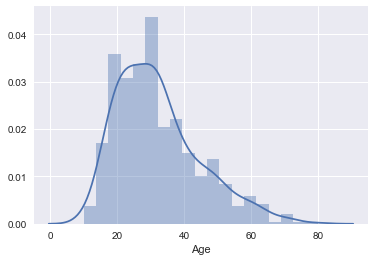

In [ ]:
sns.distplot(data_no_mv['Age'])
plt.show()

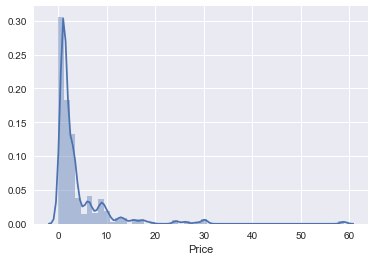

In [ ]:
sns.distplot(data_no_mv['Price'])
plt.show()

### 6.2: Remove values above a certain number

I will remove values only for the Price, not for the Age.

Also, note that there is no correct way for missing values or outlier analysis. It really depends on your intuition and domain knowledge. Also, it is an iterative process. Usually, you go with some intuition and do data processing. You then check your predictions and the accuracy of prediction. If you think it's low, you can then go back and try to fiddle around with the raw data again and see if you missed something important in data preprocessing.

Also, check that you don't lose too much data due to excessive processing.

In [ ]:
q = 20
data_no_ol_m1 = data_no_mv[data_no_mv['Price'] < q]

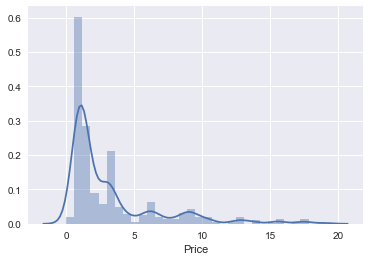

In [ ]:
sns.distplot(data_no_ol_m1['Price'])
plt.show()

In [ ]:
data_pp = data_no_ol_m1.copy()
data_pp.describe(include='all')

,Interested?,Bottle type,Age,Price,Customer name
count,634.000000,634.000000,634.000000,634.000000,634
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Mr. Surname
freq,NaN,NaN,NaN,NaN,415
mean,0.375394,2.258675,32.083430,3.218927,NaN
std,0.484607,0.831430,12.486386,3.557706,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN
25%,0.000000,2.000000,23.000000,0.900000,NaN
50%,0.000000,3.000000,30.000000,1.500000,NaN
75%,1.000000,3.000000,39.000000,3.500000,NaN


## 7. Are there any additional processing steps you could think of at this stage that could result in more insights for your company?

Note that although the Customer name column remained anonymous, people did give away their gender by mentioning Mr or Miss. We could use this to our advantage and create an additional column called "Gender" in the same dataframe. This way, we can see in the future whether there is a preference for the product depending on the gender.

This is an example of how you can squeeze more information out of the data in hand. Many a times, you will have "Remarks" and "Reviews" left behind by the customers, and by going through them, you can extract more information. Real-life raw data is extremely messy, and in fact a lot of time is spent on data collection and preprocessing!

In [ ]:
data_pp.iloc[0,4].split()[0]

'Mr.'

In [ ]:
data_pp['Gender'] = ['male' if x.split()[0] == 'Mr.' else 'female' for x in data_pp['Customer name']]
data_pp = data_pp.drop(['Customer name'], axis=1)
data_pp.describe(include='all')

,Interested?,Bottle type,Age,Price,Gender
count,634.000000,634.000000,634.000000,634.000000,634
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,male
freq,NaN,NaN,NaN,NaN,415
mean,0.375394,2.258675,32.083430,3.218927,NaN
std,0.484607,0.831430,12.486386,3.557706,NaN
min,0.000000,1.000000,10.000000,0.000000,NaN
25%,0.000000,2.000000,23.000000,0.900000,NaN
50%,0.000000,3.000000,30.000000,1.500000,NaN
75%,1.000000,3.000000,39.000000,3.500000,NaN


## 8. Correlation matrix

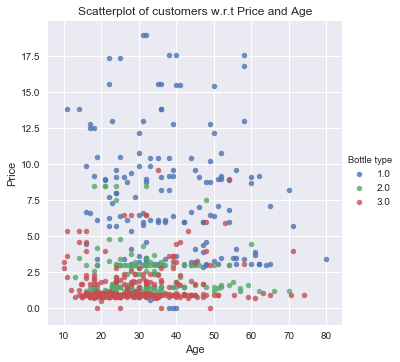

In [ ]:
sns.lmplot('Age', 'Price', data=data_pp, fit_reg=False, hue="Bottle type", scatter_kws={"marker": ".", "s": 30})
plt.title('Scatterplot of customers w.r.t Price and Age')
plt.show()

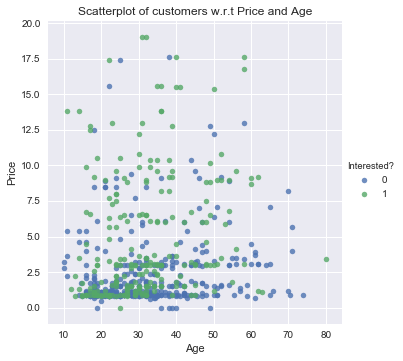

In [ ]:
sns.lmplot('Age', 'Price', data=data_pp, fit_reg=False, hue="Interested?", scatter_kws={"marker": ".", "s": 30})
plt.title('Scatterplot of customers w.r.t Price and Age')
plt.show()

Correlation is a standardized measure of the joint variability of two variables. It takes on values between -1 and 1, thus it is easy for us to interpret the result.

- A correlation of 1, known as perfect positive correlation, means that one variable is perfectly explained by the other. (We can observe a positive correlation between the interest in the product and the price a customer is willing to pay. The more interested they are, they are willing to pay more.)

- A correlation of 0 means that the variables are independent.
- A correlation of -1, known as perfect negative correlation, means that one variable is explaining the other one perfectly, but they move in opposite directions. (We can observe a negative correlation between the bottle type and the price a customer is willing to pay. In this case, the more complex the bottle design is, a customer is willing to pay less.)

Sample correlation is given by:
## $\Gamma = \frac{s_{xy}}{s_{x}s_{y}}$

Populationn correlation is given by:
## $\rho = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$

In [ ]:
data_pp.corr(method='pearson')

,Interested?,Bottle type,Age,Price
Interested?,1.000000,-0.347250,-0.013026,0.334353
Bottle type,-0.347250,1.000000,-0.328531,-0.676192
Age,-0.013026,-0.328531,1.000000,0.177572
Price,0.334353,-0.676192,0.177572,1.000000


Additional insight: We see that the Age and bottle type are negatively correlated. Probably, the company members who conducted this survey unconsciously gave away more complex and colorful bottles to younger people, and simple designs to older people? This can be discussed in the company meeting and the next time a survey is conducted, this "unconscious bias" can be removed.

## 9. With the knowledge you gained regarding correlation, would you reapproach the imputation of the bottle type variable? If yes, how?

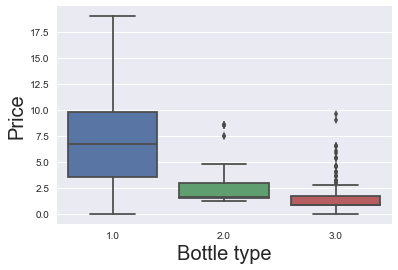

In [ ]:
sns.boxplot(x="Bottle type", y="Price", data=data_pp)
plt.xlabel('Bottle type', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

This seems more reasonable than plugging in the most frequent values. This should lead to a more meaningful way of imputing the missing values. As you see, unless you analyse the data well, you wouldn't know what's the best way to impute data. Therefore, data preprocessing and analysis go hand-in-hand.